# <center>Collection of Soilgrid values corresponding to occurrence records</center>

## Import required libraries

In [18]:
#Required packages
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS
from fiona.crs import from_epsg
import rasterio
import georasters as gr
import glob
import matplotlib.pyplot as plt

## File with occurrence records

In [2]:
species_file = pd.read_csv('.../data/occ_rare_rarefied_points.csv')

## Folders with Soilgrid's raster layers

In [20]:
dir_soil = 'E:/proposal/writeup/New project/Soilgrid/soilgrid0-30/'

### List of Soilgrid raster files for standard depth layer 0-5, 5-15 and 15-30.

In [21]:
layer_0_5 = ['bdod_0-5cm_mean','cec_0-5cm_mean','cfvo_0-5cm_mean','clay_0-5cm_mean',
             'nitrogen_0-5cm_mean','ocd_0-5cm_mean','phh2o_0-5cm_mean','sand_0-5cm_mean','silt_0-5cm_mean',
             'soc_0-5cm_mean']
layer_5_15 = ['bdod_5-15cm_mean','cec_5-15cm_mean','cfvo_5-15cm_mean','clay_5-15cm_mean',
             'nitrogen_5-15cm_mean','ocd_5-15cm_mean','phh2o_5-15cm_mean','sand_5-15cm_mean','silt_5-15cm_mean',
             'soc_5-15cm_mean']
layer_15_30 = ['bdod_15-30cm_mean','cec_15-30cm_mean','cfvo_15-30cm_mean','clay_15-30cm_mean',
             'nitrogen_15-30cm_mean','ocd_15-30cm_mean','phh2o_15-30cm_mean','sand_15-30cm_mean','silt_15-30cm_mean',
             'soc_15-30cm_mean']
layer_0_30 = ['ocs_0-30cm_mean']
layers = [layer_0_5, layer_5_15, layer_15_30, layer_0_30]

plot of Soilgrid raster file

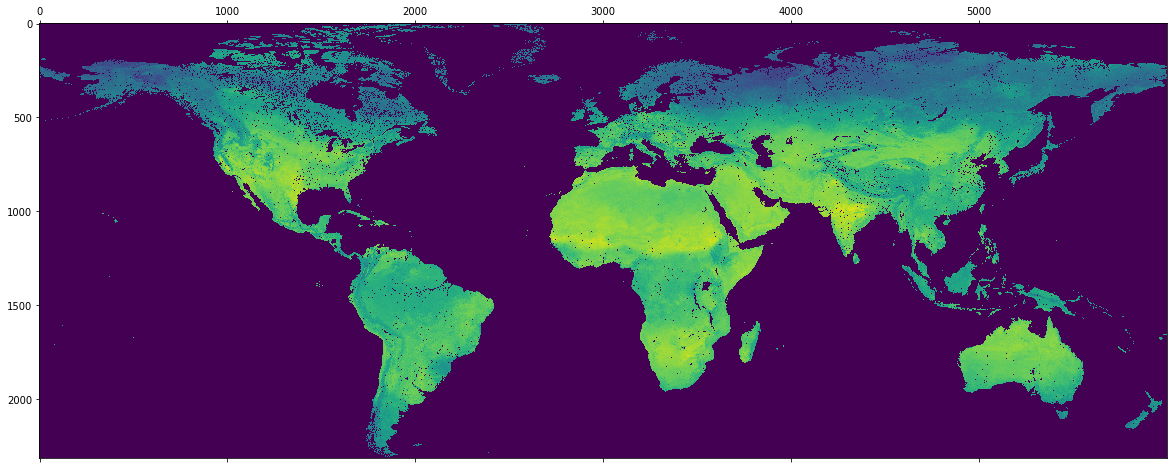

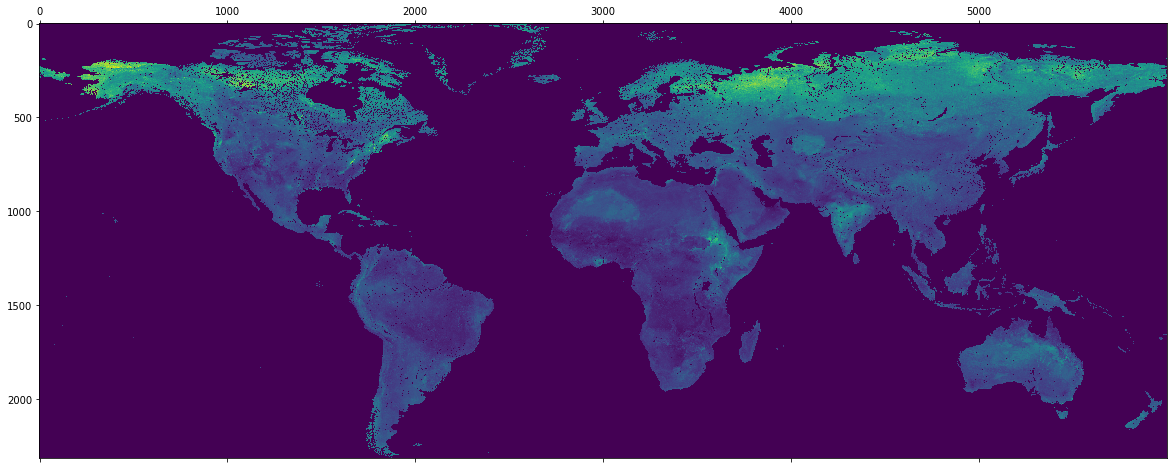

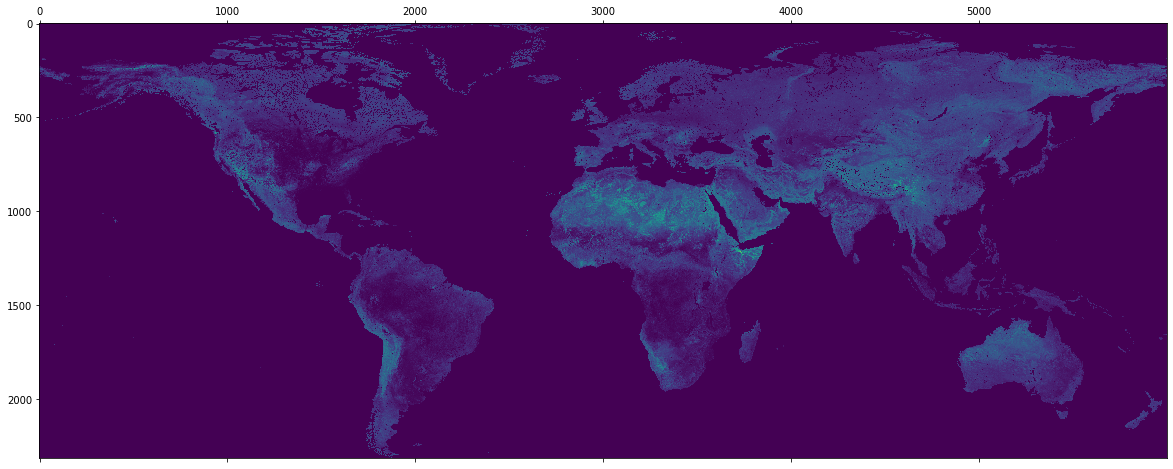

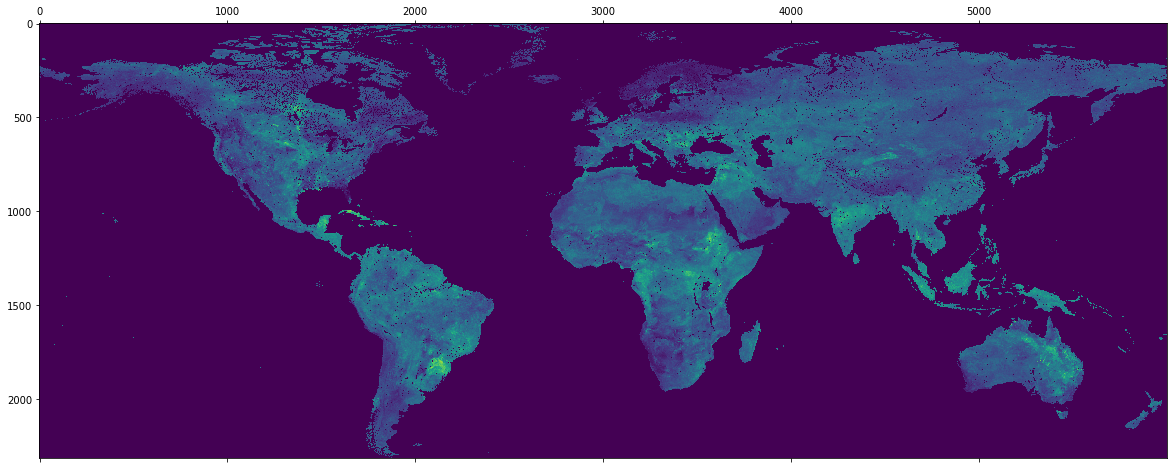

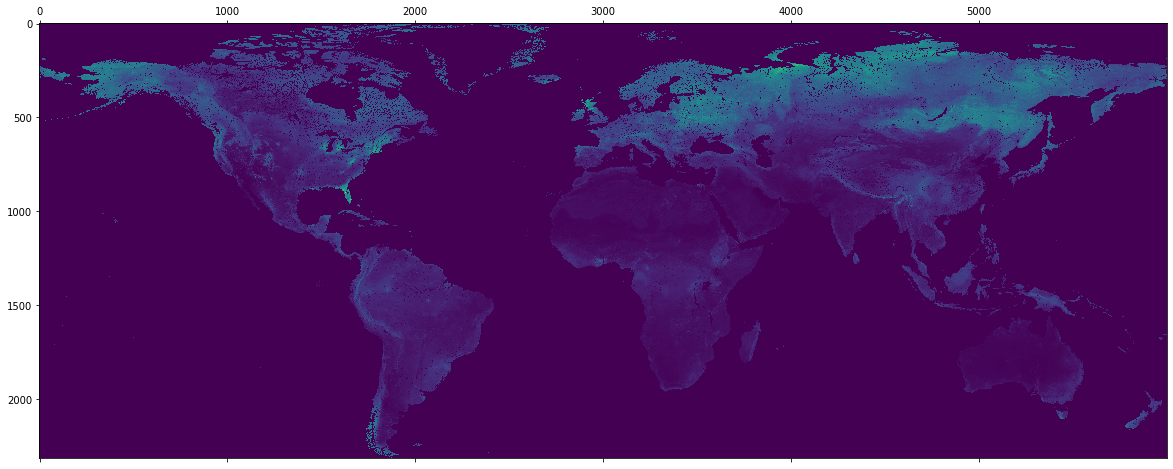

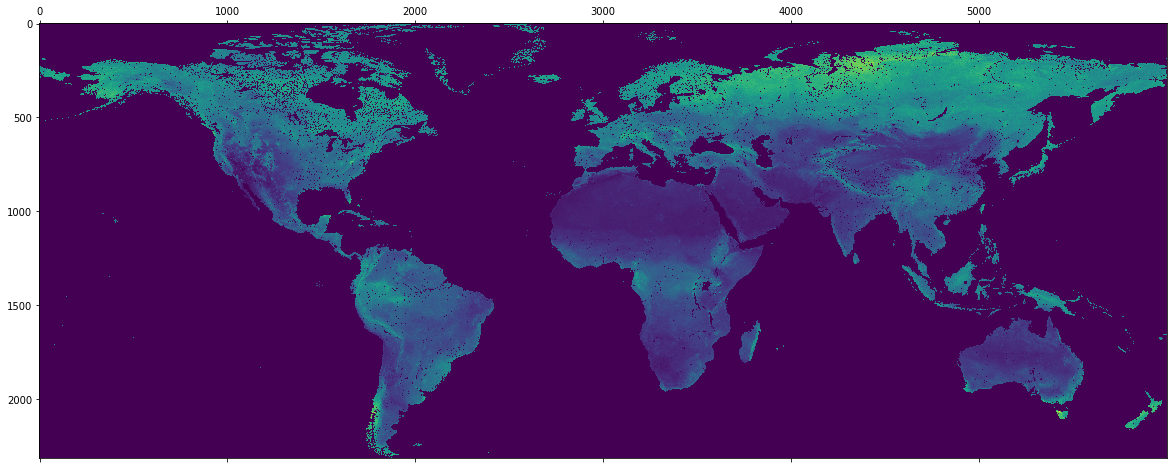

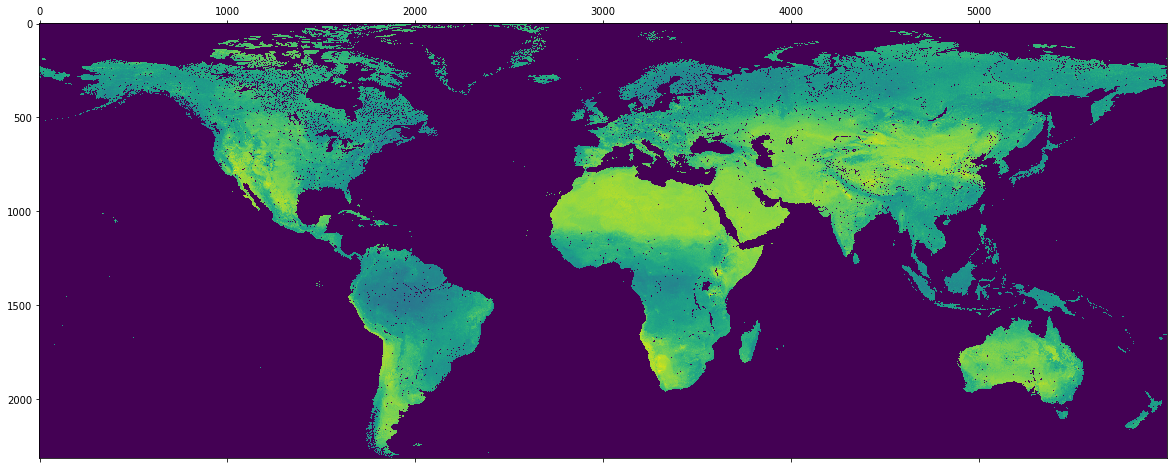

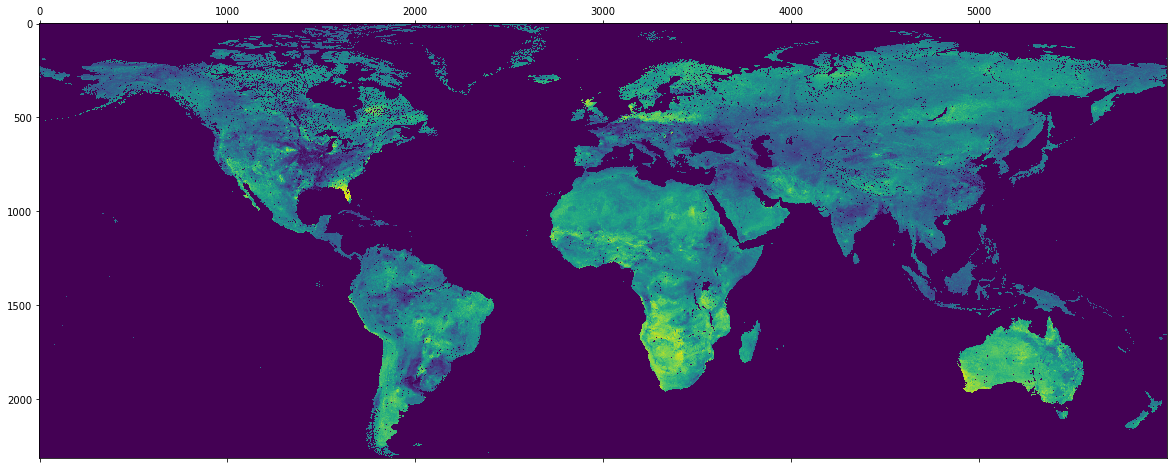

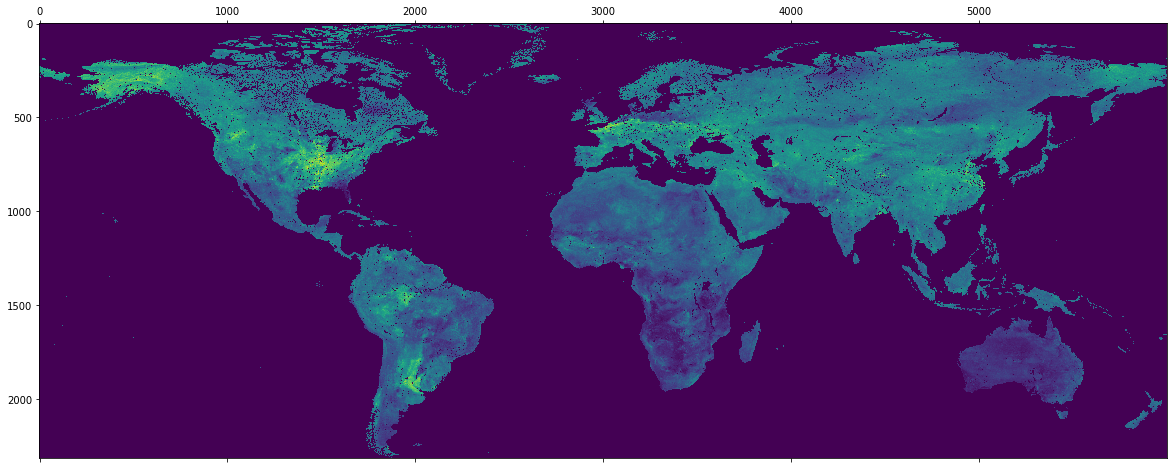

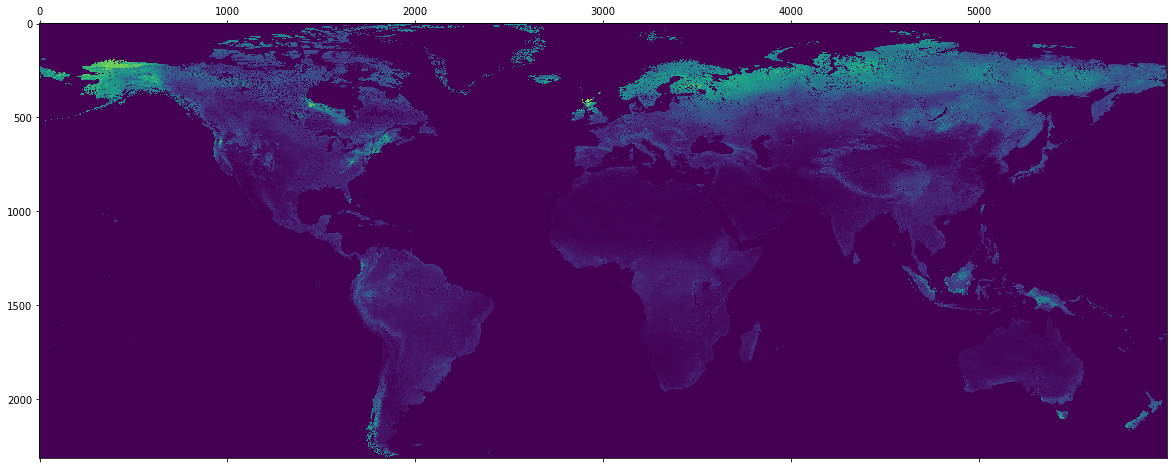

In [31]:
for i in range(len(layer_0_5)):
    raster_file = gr.from_file(dir_soil + layers[0][i] + '.tif')
    raster_file.plot(figsize = (22,8))
    plt.savefig('E:/proposal/writeup/New project/Soilgrid/images/'+layers[0][i]+'.jpg',dpi=400)

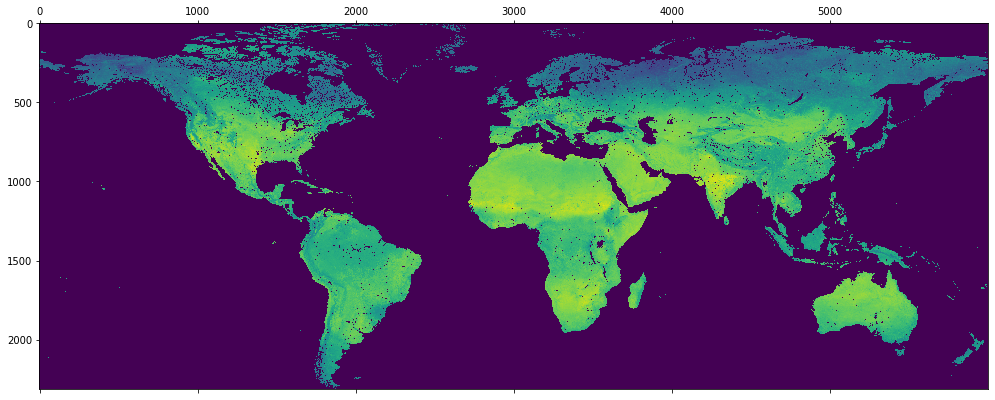

In [25]:
raster_file = gr.from_file(dir_soil + layers[0][0] + '.tif')
raster_file.plot(figsize = (17,15))

### Collect soilgrid values corresponding to occurrence records by using the following code:

Since occurrence records file is in csv format which we need to convert into shapefile to collect soilgrids values. Instead we are going to convert occurrence records dataframe into geodataframe and use the geometric locations to collect soilgrids values.

In [7]:
geometry = [Point(xy) for xy in zip(species_file.Long, species_file.Lat)] # Formation of geometric locations using longitude and latitude values
crs = CRS.from_epsg(4326) # setup of coordinate reference system
species_final = gpd.GeoDataFrame(species_file, crs= crs, geometry = geometry) # Converting dataframe into geodataframe
species_final.index = range(len(species_final))
coords = [(x,y) for x,y in zip(species_final.Long, species_final.Lat)]
for j in range(len(layers)):
    for i in range(len(layers[j])):
        src = rasterio.open(dir_soil + layers[j][i] + '.tif') ## reading raster file
        species_final[layers[j][i]] = [x[0] for x in src.sample(coords)] ## collecting soilgrids values
species_final.to_csv('occ_rare_rarefied_points_soilgrid.csv') ## Saving data into csv file.

In [8]:
species_final.head()

Species        Long        Lat  Site                    geometry  \
0  ae_cor   98.281670  45.422500  gbif   POINT (98.28167 45.42250)   
1  ae_cor   98.281670  45.422500  gbif   POINT (98.28167 45.42250)   
2  ae_cor  103.891670  36.520000  gbif  POINT (103.89167 36.52000)   
3  ae_cor  112.102389  34.801982  gbif  POINT (112.10239 34.80198)   
4  ae_cor  106.673040  33.153550  gbif  POINT (106.67304 33.15355)   

   bdod_0-5cm_mean  cec_0-5cm_mean  cfvo_0-5cm_mean  clay_0-5cm_mean  \
0              132             221              195              214   
1              132             221              195              214   
2              131             150              138              201   
3              129             212              107              218   
4              126             203              135              238   

   nitrogen_0-5cm_mean  ...  cec_15-30cm_mean  cfvo_15-30cm_mean  \
0                  275  ...               196                207   
1                  275  ...               196                207   
2                  224  ...               130                145   
3                  138  ...               211                113   
4                  405  ...               182                150   

   clay_15-30cm_mean  nitrogen_15-30cm_mean  ocd_15-30cm_mean  \
0                227                    119               148   
1                227                    119               148   
2                209                     97               145   
3                210                     69               132   
4                263                    136               168   

   phh2o_15-30cm_mean  sand_15-30cm_mean  silt_15-30cm_mean  soc_15-30cm_mean  \
0                  79                395                378               103   
1                  79                395                378               103   
2                  83                243                548               116   
3                  81                350                440                62   
4                  70                255                482                88   

   ocs_0-30cm_mean  
0               28  
1               28  
2               27  
3               33  
4               45  

[5 rows x 36 columns]